                                                  Problem Statement
When Bank offers Personal Loans to customers, some customers may accept it and some of them may not accept it based on 
their requirements. In order to avoid this in-effective approach, Bank wants to identify the potential customers who can accept 
the loan in advance and then provide loan offers.
As a data scientist, we should look for the pattern in the given dataset and build the model which can help Bank to predict the
potential customers and targeting them for offers.

                            Project Title - Predictive Model Building to Identify Potential Customers

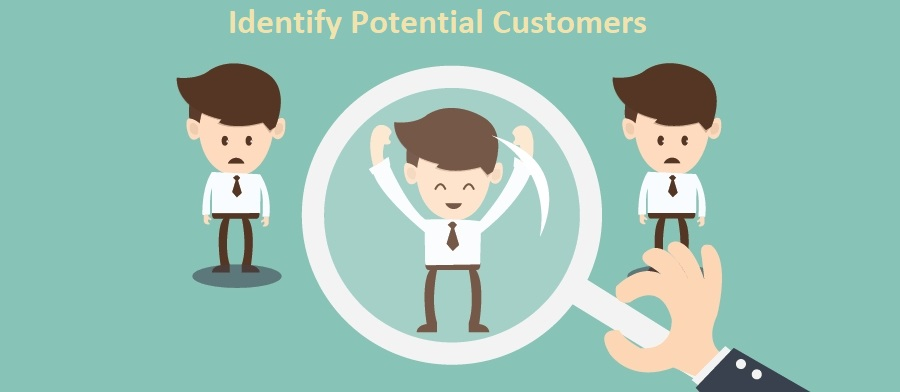

In [1]:
from IPython.display import Image
Image(filename='Potential_Customers.jpg')

                                                          Contents

1. Data Sourcing and Basic Checks
2. Exploratory Data Analysis (for Categorical)
3. Outlier Detection, Correction and EDA (for Continuous)
4. Feature Engineering
5. Dummy Variable Creation and Sampling
6. Cost Sensitive Learning and Evaluation Metrics
7. Model Building and Cross-Validation
8. Finalizing and Saving the Model
9. Model Deployment

                                           1. Data Sourcing and Basic Checks

In [2]:
# Connect to the working directory
import os
os.getcwd()
os.chdir('C:/Users/Abin/Desktop/Case_Study')
# import the required package and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Import the fulldata
fulldata=pd.read_csv('CaseStudy.csv')
fulldata.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
fulldata.shape

(5000, 13)

                                                Check for missing values

In [5]:
fulldata.isnull().sum()

Age                  0
Experience           0
Income               0
ZIP Code             0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

                                                Check for Unique Features

In [6]:
fulldata.nunique()

Age                   45
Experience            47
Income               162
ZIP Code             467
Family                 4
CCAvg                108
Education              3
Mortgage             347
PersonalLoan           2
SecuritiesAccount      2
CDAccount              2
Online                 2
CreditCard             2
dtype: int64

                                                 Check the data types

In [7]:
fulldata.dtypes

Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

                                       Convert data types for some categorical features

In [8]:
fulldata['Family']=fulldata['Family'].astype('object')
fulldata['Education']=fulldata['Education'].astype('object')
fulldata['PersonalLoan']=fulldata['PersonalLoan'].astype('object')
fulldata['SecuritiesAccount']=fulldata['SecuritiesAccount'].astype('object')
fulldata['CDAccount']=fulldata['CDAccount'].astype('object')
fulldata['Online']=fulldata['Online'].astype('object')
fulldata['CreditCard']=fulldata['CreditCard'].astype('object')

In [9]:
fulldata.dtypes # Cross check

Age                    int64
Experience             int64
Income                 int64
ZIP Code               int64
Family                object
CCAvg                float64
Education             object
Mortgage               int64
PersonalLoan          object
SecuritiesAccount     object
CDAccount             object
Online                object
CreditCard            object
dtype: object

                                                 2 . Exploratory Data Analysis

a. Categorical Variable (Uni-Variate)
b. Categorical Variable (Bi-Variate)

                                             a. Categorical Variable (Uni-Variate)

In [10]:
fulldata['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [11]:
fulldata['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [12]:
fulldata['PersonalLoan'].value_counts()  # Data is imbalanced

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [13]:
fulldata['SecuritiesAccount'].value_counts()

0    4478
1     522
Name: SecuritiesAccount, dtype: int64

In [14]:
fulldata['CDAccount'].value_counts()

0    4698
1     302
Name: CDAccount, dtype: int64

In [15]:
fulldata['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [16]:
fulldata['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

Key Findings:
1. Classes are imbalanced as we can see for Personal Loan (counts)

                                            b. Categorical (Bi-Variate)

                          Chi Square test for independence is used to measure the association

                               Measuring the association between Family and Personal Loan

In [17]:
BV=pd.crosstab(fulldata['Family'],columns=fulldata['PersonalLoan'],margins=True)
BV

PersonalLoan,0,1,All
Family,,,
1,1365,107,1472
2,1190,106,1296
3,877,133,1010
4,1088,134,1222
All,4520,480,5000


In [18]:
stats.chi2_contingency(BV) # Pvalue is 0.00024 (less than 0.05). So there could be an association between Family & PersonalLoan

(29.676116414854743,
 0.00024112760211947776,
 8,
 array([[1330.688,  141.312, 1472.   ],
        [1171.584,  124.416, 1296.   ],
        [ 913.04 ,   96.96 , 1010.   ],
        [1104.688,  117.312, 1222.   ],
        [4520.   ,  480.   , 5000.   ]]))

                              Measuring the association between Education and Personal Loan

In [19]:
BV=pd.crosstab(fulldata['Education'],columns=fulldata['PersonalLoan'],margins=True)
BV

PersonalLoan,0,1,All
Education,,,
1,2003,93,2096
2,1221,182,1403
3,1296,205,1501
All,4520,480,5000


In [20]:
stats.chi2_contingency(BV) # Pvalue is less than 0.05. So there could be an association between Education & PersonalLoan

(111.23987187389132,
 1.121018913718903e-21,
 6,
 array([[1894.784,  201.216, 2096.   ],
        [1268.312,  134.688, 1403.   ],
        [1356.904,  144.096, 1501.   ],
        [4520.   ,  480.   , 5000.   ]]))

                          Measuring the association between SecuritiesAccount and Personal Loan

In [21]:
BV=pd.crosstab(fulldata['SecuritiesAccount'],columns=fulldata['PersonalLoan'],margins=True)
BV

PersonalLoan,0,1,All
SecuritiesAccount,,,
0,4058,420,4478
1,462,60,522
All,4520,480,5000


In [22]:
stats.chi2_contingency(BV) # Pvalue (0.66) is more than 0.05. So there is a less probability for an association between SAccount & PL

(2.4098647218383684,
 0.6608452854913409,
 4,
 array([[4048.112,  429.888, 4478.   ],
        [ 471.888,   50.112,  522.   ],
        [4520.   ,  480.   , 5000.   ]]))

                           Measuring the association between CDAccount and Personal Loan

In [23]:
BV=pd.crosstab(fulldata['CDAccount'],columns=fulldata['PersonalLoan'],margins=True)
BV

PersonalLoan,0,1,All
CDAccount,,,
0,4358,340,4698
1,162,140,302
All,4520,480,5000


In [24]:
stats.chi2_contingency(BV) # Pvalue is less than 0.05. So there could be an association between CDAccount & Personal Loan

(500.40189046908114,
 5.484428600042934e-107,
 4,
 array([[4246.992,  451.008, 4698.   ],
        [ 273.008,   28.992,  302.   ],
        [4520.   ,  480.   , 5000.   ]]))

                           Measuring the association between Online and Personal Loan

In [25]:
BV=pd.crosstab(fulldata['Online'],columns=fulldata['PersonalLoan'],margins=True)
BV

PersonalLoan,0,1,All
Online,,,
0,1827,189,2016
1,2693,291,2984
All,4520,480,5000


In [26]:
stats.chi2_contingency(BV) # Pvalue (0.99) is more than 0.05. So there is a less probability for an association between Online & PL

(0.197054830778904,
 0.9954535209245551,
 4,
 array([[1822.464,  193.536, 2016.   ],
        [2697.536,  286.464, 2984.   ],
        [4520.   ,  480.   , 5000.   ]]))

                           Measuring the association between CreditCard and Personal Loan

In [27]:
BV=pd.crosstab(fulldata['CreditCard'],columns=fulldata['PersonalLoan'],margins=True)
BV

PersonalLoan,0,1,All
CreditCard,,,
0,3193,337,3530
1,1327,143,1470
All,4520,480,5000


In [28]:
stats.chi2_contingency(BV) # Pvalue (0.99) is more than 0.05. So there is a less probability for an association between Ccard & PL

(0.039242258946581565,
 0.9998100051797862,
 4,
 array([[3191.12,  338.88, 3530.  ],
        [1328.88,  141.12, 1470.  ],
        [4520.  ,  480.  , 5000.  ]]))

In [29]:
fulldata.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

Key Findings from Chi-Square Test (Personal Loan Vs Categorical predictors)

1. Family, Education, CDAccount has a good association with Personal Loan (It can be a Significant Variable)
2. SecuritiesAccount, Online, CreditCard has a bad association with Personal Loan (It can't be a Significant Variable)

                               3. Outlier Detection, Correction and EDA (for Continuous)

In [30]:
fulldata.describe()

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800
std,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802
min,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000


                                               Outlier Detection

In [31]:
np.percentile(fulldata.loc[:,'Age'], [92,93,95,96,97,98,99,100]) 

array([62., 62., 63., 63., 64., 65., 65., 67.])

In [32]:
np.percentile(fulldata.loc[:,'Age'], [0.1,0.2,0.3,0.4]) 

array([23., 23., 24., 24.])

In [33]:
np.percentile(fulldata.loc[:,'Experience'], [92,93,95,96,97,98,99,100]) 

array([36.08, 37.  , 38.  , 38.  , 39.  , 40.  , 41.  , 43.  ])

In [34]:
np.percentile(fulldata.loc[:,'Experience'], [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1,10]) # Experience never goes to below 0

array([-3., -2., -2., -2., -1., -1., -1., -1., -1., -1.,  4.])

In [35]:
np.percentile(fulldata.loc[:,'Income'], [92,93,95,96,97,98,99,100]) 

array([154.  , 159.  , 170.  , 175.  , 180.03, 185.  , 193.  , 224.  ])

In [36]:
np.percentile(fulldata.loc[:,'Income'], [0.1,0.2,0.3,0.4,0.5]) 

array([8., 8., 8., 8., 9.])

In [37]:
np.percentile(fulldata.loc[:,'CCAvg'], [92,93,95,96,97,98,99,100]) 

array([ 4.7,  5. ,  6. ,  6.4,  6.8,  7.3,  8. , 10. ])

In [38]:
np.percentile(fulldata.loc[:,'CCAvg'], [0.1,0.2,0.3,0.4,0.5]) 

array([0., 0., 0., 0., 0.])

In [39]:
np.percentile(fulldata.loc[:,'Mortgage'], [93,95,96,97,98,98.5,99,100]) # 635 is an outlier

array([236.  , 272.  , 301.  , 325.03, 366.04, 400.  , 431.01, 635.  ])

In [40]:
np.percentile(fulldata.loc[:,'Mortgage'], [0.1,0.2,0.3,0.4,0.5]) 

array([0., 0., 0., 0., 0.])

1. As we can see above, for experience variable we have found negative values. It should be replaced with zero.
2. And Mortgage Variable, between 99th and 100th percentile, there is a huge jump. So, we can cap that value to 431.01

                                              Outlier Correction

In [41]:
fulldata.loc[fulldata['Experience']<0,'Experience']=0         # Negative numbers are changed to zero
fulldata.loc[fulldata['Mortgage']>431.01,'Mortgage']=431.01   # Capping is done

                                      Continuous Variable (Bi-Variate Analysis)

In [42]:
correlation=fulldata.corr()
correlation

,Age,Experience,Income,ZIP Code,CCAvg,Mortgage
Age,1.000000,0.994198,-0.055269,-0.029216,-0.052012,-0.011654
Experience,0.994198,1.000000,-0.046729,-0.028783,-0.049912,-0.010121
Income,-0.055269,-0.046729,1.000000,-0.016410,0.645984,0.195322
ZIP Code,-0.029216,-0.028783,-0.016410,1.000000,-0.004061,0.006853
CCAvg,-0.052012,-0.049912,0.645984,-0.004061,1.000000,0.101804
Mortgage,-0.011654,-0.010121,0.195322,0.006853,0.101804,1.000000


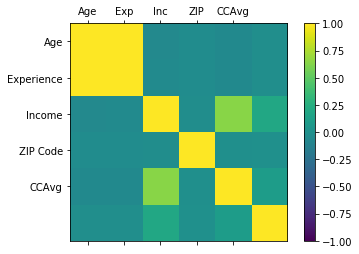

In [43]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlation,vmin=-1,vmax=1)
names=[x for x in fulldata.dtypes.index if fulldata.dtypes[x]!='object']
name=['Age','Exp','Inc','ZIP','CCAvg']
fig.colorbar(cax)
ticks=np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(name)
ax.set_yticklabels(names)
plt.show()

                                        Two sample t-test (To measure association)

To analyze the association between the Categorical dependent variable with two levels and continuous predictors, 
Two sample t-test is used

In [44]:
Age_Rejected = fulldata[fulldata['PersonalLoan'] == 0]['Age'] # Subsetting age of the person who rejected loan
Age_Accepted = fulldata[fulldata['PersonalLoan'] == 1]['Age'] # Subsetting age of the person who accepted loan
stats.ttest_ind(Age_Rejected, Age_Accepted) # t test with 95% confidence 

Ttest_indResult(statistic=0.5461906615539323, pvalue=0.584959263705325)

In [45]:
Exp_Rejected = fulldata[fulldata['PersonalLoan'] == 0]['Experience']
Exp_Accepted = fulldata[fulldata['PersonalLoan'] == 1]['Experience']
stats.ttest_ind(Exp_Rejected, Exp_Accepted)  

Ttest_indResult(statistic=0.5555651090006847, pvalue=0.5785330550261647)

In [46]:
Inc_Rejected = fulldata[fulldata['PersonalLoan'] == 0]['Income']
Inc_Accepted = fulldata[fulldata['PersonalLoan'] == 1]['Income']
stats.ttest_ind(Inc_Rejected, Inc_Accepted) 

Ttest_indResult(statistic=-41.08533291207552, pvalue=0.0)

In [47]:
CCAvg_Rejected = fulldata[fulldata['PersonalLoan'] == 0]['CCAvg']
CCAvg_Accepted = fulldata[fulldata['PersonalLoan'] == 1]['CCAvg']
stats.ttest_ind(CCAvg_Rejected, CCAvg_Accepted) 

Ttest_indResult(statistic=-27.882127015069404, pvalue=3.8302661578168557e-159)

In [48]:
Mort_Rejected = fulldata[fulldata['PersonalLoan'] == 0]['Mortgage']
Mort_Accepted = fulldata[fulldata['PersonalLoan'] == 1]['Mortgage']
stats.ttest_ind(CCAvg_Rejected, CCAvg_Accepted) 

Ttest_indResult(statistic=-27.882127015069404, pvalue=3.8302661578168557e-159)

Key Findings:
1. Income, CCAvg and Mortgage can be a significant Variable
2. Age and Experience does not show more association

                                              4. Feature Engineering

In [49]:
fulldata['CCAvg_Income_ratio']= fulldata['CCAvg']/fulldata['Income']

                                    5. Dummy Variable Creation and Sampling

Zip Code Variable has more categories, keeping in our analyis would not be meaningfull as it has less variance.
So, we can drop before sampling from the dataset.

In [50]:
fullset=fulldata.drop(['ZIP Code'],axis=1)
fullset.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard', 'CCAvg_Income_ratio'],
      dtype='object')

In [51]:
object_val=[x for x in fullset.dtypes.index if fullset.dtypes[x]=='object']
object_val

['Family',
 'Education',
 'PersonalLoan',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard']

In [52]:
df_dummy = pd.DataFrame(data=fullset, columns=object_val) # dataframe with categorical variables

dummy_coded=pd.get_dummies(df_dummy,drop_first=True,dtype=float) # with K-1 levels
dummy_fullset=pd.concat([fullset,dummy_coded],axis=1) # merging dummy variable with main dataframe
to_rem=object_val.copy()
dummy_fullset.drop(to_rem,axis=1,inplace=True) # removing the duplicate columns
dummy_fullset.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'CCAvg_Income_ratio', 'Family_2', 'Family_3', 'Family_4', 'Education_2',
       'Education_3', 'PersonalLoan_1', 'SecuritiesAccount_1', 'CDAccount_1',
       'Online_1', 'CreditCard_1'],
      dtype='object')

In [53]:
dummy_fullset.head()

,Age,Experience,Income,CCAvg,Mortgage,CCAvg_Income_ratio,Family_2,Family_3,Family_4,Education_2,Education_3,PersonalLoan_1,SecuritiesAccount_1,CDAccount_1,Online_1,CreditCard_1
0,25,1,49,1.6,0.0,0.032653,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,45,19,34,1.5,0.0,0.044118,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,39,15,11,1.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35,9,100,2.7,0.0,0.027000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35,8,45,1.0,0.0,0.022222,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


                                            Sample it into train and test set

In [54]:
# Split the dataframe into x and y
data_x=dummy_fullset.drop('PersonalLoan_1',axis=1).copy()
data_y=dummy_fullset['PersonalLoan_1'].copy()

In [55]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.20, random_state=5) # 80% training and 20% test

In [56]:
print(train_x.shape) # Cross check
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(4000, 15)
(1000, 15)
(4000,)
(1000,)


                                          6. Cost Sensitive Learning
                                          
As our dependent variable PersonalLoan is heavily biased to the customer who does not accept the loan offers (0), dataset should be processed with undersampling, Oversampling or Cost Sensitive Learning methods.
As Cost Sensitive Learning (CSL) method is an effective method to tackle imbalanced datasets. So, CSL is considered.
In our case study, CSL method is applied by adding weights to the minority classes (In our case, minority class is the customer who accept the loan offers (1) )

class_weight argument is added in the model for all the techniques (except xgb model)

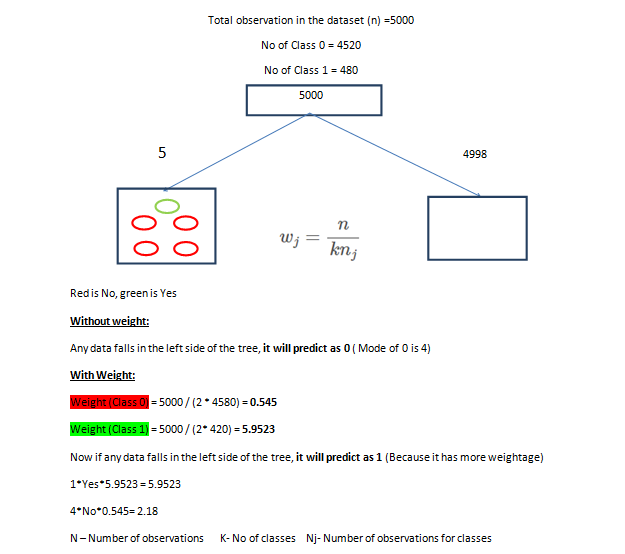

In [57]:
from IPython.display import Image
Image(filename='CSL.PNG') # Intuition of adding weights

                                                Evaluation Metrics

Our business wants to correctly identify the potential customers (recall) and also to avoid false positive rate, 
f score (weighted recall & precision) is used for the entire model building process.

                                                  Model Building

a. Random Forest (Used for Variable Selection)
b. Logistic Regression
c. Decision Tree
d. Support Vector Machine + Feature Standardization
e. Adaptive Boosting
f. Gradient Boosting
h. Xtreme Gradient Boosting

                                                 a. Random Forest

In [58]:
# Random Forest Classifier and some modules required for our analysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, f1_score, accuracy_score, precision_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

                                    GridSearchCV - To choose the optimal parameter

In [59]:
# Choosing the optimal parameter for the classifier                     

param_grid = [{'max_depth':[4,6,8,10,12,14],'n_estimators':[50,100,150,200,250]}]

scorer={'f1_score': make_scorer(f1_score)}

RF = RandomForestClassifier(random_state = 123,n_estimators=100,criterion='entropy',class_weight='balanced',max_features='sqrt')
RF_GS=GridSearchCV(RF,param_grid=param_grid,scoring=scorer,refit='f1_score',cv=5,n_jobs=-1)
RF_GS.fit(train_x,train_y)  
RF_GS.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [60]:
RF_GS.best_score_

0.9104357865411867

                                          Build the model with optimal parameter

In [61]:
RF_1 = RandomForestClassifier(random_state = 123,n_estimators=200,criterion='entropy',class_weight='balanced',max_depth=10,max_features='sqrt')
RF_1.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

In [62]:
# predict on test set
pred_test_RF=RF_1.predict(test_x)
metrics.f1_score(test_y,pred_test_RF)

0.9310344827586208

In [63]:
Confusion_Mat_test_RF = confusion_matrix(test_y,pred_test_RF)
Confusion_Mat_test_RF

array([[907,   5],
       [  7,  81]], dtype=int64)

In [64]:
Var_Importance_RF= pd.Series(data=RF_1.feature_importances_,index=train_x.columns,name='variables')
Var_Importance_RF

Age                    0.025557
Experience             0.025897
Income                 0.428893
CCAvg                  0.200182
Mortgage               0.031640
CCAvg_Income_ratio     0.082746
Family_2               0.013389
Family_3               0.019946
Family_4               0.024206
Education_2            0.043993
Education_3            0.042334
SecuritiesAccount_1    0.004198
CDAccount_1            0.043469
Online_1               0.006570
CreditCard_1           0.006979
Name: variables, dtype: float64

In [65]:
# subset x and y with important predictors
least_importance=Var_Importance_RF[Var_Importance_RF.values < 0.01].index
train_x_1=train_x.drop(least_importance,axis=1).copy()
test_x_1=test_x.drop(least_importance,axis=1).copy()

                                          Random Forest Model-2 with important predictors

In [66]:
RF_2 = RandomForestClassifier(random_state = 123,n_estimators=200,criterion='entropy',class_weight='balanced',max_depth=10,max_features='sqrt')
RF_2=RF_2.fit(train_x_1,train_y)

In [67]:
# predict on test set
pred_test_RF_2=RF_2.predict(test_x_1)
metrics.f1_score(test_y,pred_test_RF_2)

0.9318181818181818

In [68]:
Confusion_Mat_test_RF_2 = confusion_matrix(test_y,pred_test_RF_2)
Confusion_Mat_test_RF_2

array([[906,   6],
       [  6,  82]], dtype=int64)

In [69]:
Var_Importance_RF_2= pd.Series(data=RF_2.feature_importances_,index=train_x_1.columns,name='variables')
Var_Importance_RF_2

Age                   0.023149
Experience            0.023180
Income                0.442959
CCAvg                 0.197899
Mortgage              0.024819
CCAvg_Income_ratio    0.079095
Family_2              0.012477
Family_3              0.026050
Family_4              0.029072
Education_2           0.049248
Education_3           0.049253
CDAccount_1           0.042797
Name: variables, dtype: float64

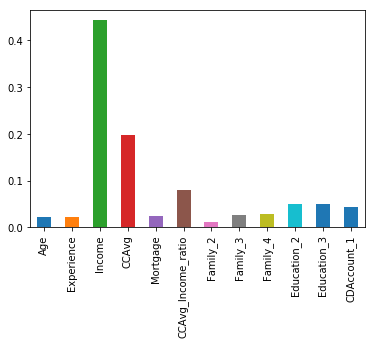

In [70]:
%matplotlib inline
Var_Importance_RF_2.plot(kind='bar')

                                        Test the generalization of the model

In [71]:
from sklearn.cross_validation import cross_val_score
cross_val=cross_val_score(RF_2,train_x_1,train_y,cv=5,scoring='f1',n_jobs=-1)
cross_val.mean()

C:\Users\Abin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9168119770082699

From the above result, it is clear that our model is performing well with different sub-samples from the same population

In [72]:
fscore=[]
fscore.append(metrics.f1_score(test_y,pred_test_RF_2)) # for final comparison

In [73]:
cscore=[]
cscore.append(cross_val.mean()) # for final comparison

                                                b. Logistic Regression

                                          Multi-collinearity check using VIF

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for i in range(train_x_1.shape[1]):
    temp_vif=variance_inflation_factor(train_x_1.values,i)
    print(train_x_1.columns[i],": ",temp_vif)

Age :  70.25886889946916
Experience :  27.87083677956763
Income :  12.740478763942326
CCAvg :  10.485961443126964
Mortgage :  1.3828910936446857
CCAvg_Income_ratio :  9.814622031851334
Family_2 :  1.8725656112496996
Family_3 :  1.7343466327931376
Family_4 :  1.8832099623110128
Education_2 :  1.8105557678353565
Education_3 :  1.8459132530617972
CDAccount_1 :  1.1094606406567054


Multicollinearity problem inflate the coefficients and interpretation would be wrong if we considered collinearity independent variables.
But it does not affect the overall prediction result. And also for our business problem, more than variable impact (coefficient), predicting the potential customer is important

In [75]:
from sklearn.linear_model import LogisticRegression   

Log=LogisticRegression(class_weight='balanced')
Log_M1=Log.fit(train_x_1,train_y)

In [76]:
# predict on test data
pred_test_log=Log_M1.predict(test_x_1)
metrics.f1_score(test_y,pred_test_log)

0.6451612903225806

In [77]:
Confusion_Mat_Log = confusion_matrix(test_y,pred_test_log)
Confusion_Mat_Log

array([[832,  80],
       [  8,  80]], dtype=int64)

                                           Improving the model using ROC Curve

In [78]:
# calculate probabilities for the test data
train_pred_prob=Log_M1.predict_proba(train_x_1)
# take the second column,because the classifier outputs scores for the 0 class as well
Pred_Y_Prob = train_pred_prob[:,1]
Pred_Y_Prob

array([0.042496  , 0.10631298, 0.16893413, ..., 0.04170055, 0.00262976,
       0.28415204])

In [79]:
from sklearn.metrics import roc_auc_score
# For auc value
log_roc_auc=roc_auc_score(train_y,Pred_Y_Prob)
log_roc_auc

0.9640043101497806

In [80]:
# For ROC curve
fpr,tpr,thresholds=roc_curve(train_y,Pred_Y_Prob)

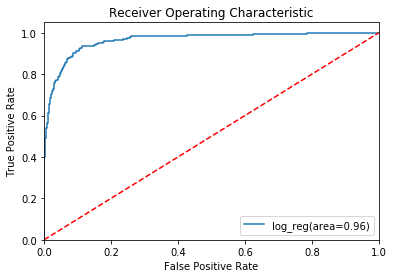

In [81]:
# ROC Curve plot
%matplotlib inline
plt.figure()
plt.plot(fpr,tpr,label='log_reg(area=%0.2f)'% log_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('log_roc')
plt.show()

In [82]:
# Optimal Cut-off point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.45037152833602123

In [83]:
# predict using the optimal cut-off point
optimal_val=pd.DataFrame({'loan':Pred_Y_Prob})
optimal_val['loan_roc']=optimal_val['loan']
optimal_val.loan_roc=np.where(optimal_val.loan_roc >0.45,1,0)
# Fscore
metrics.f1_score(train_y,optimal_val['loan_roc']) # model performance is not good

0.6240409207161125

                                          Test the generalization of the model

In [84]:
cross_val=cross_val_score(Log_M1,train_x_1,train_y,cv=5,scoring='f1',n_jobs=-1)
cross_val.mean()

0.6486254138451766

In [85]:
cscore.append(cross_val.mean()) # for final comparison

In [86]:
fscore.append(metrics.f1_score(test_y,pred_test_log)) # for final comparison

                                                 C. Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
GS = DecisionTreeClassifier(random_state=123,class_weight='balanced',max_features='sqrt')

                                    GridSearchCV - To choose the optimal parameter

In [88]:
param_grid = [{'max_depth': [2,3,4,5,6]}]
scorer={'f1_score': make_scorer(f1_score)}
Gsearch=GridSearchCV(GS,param_grid=param_grid,scoring=scorer,refit='f1_score',cv=5)
GS_Model = Gsearch.fit(train_x_1,train_y)
GS_Model.best_score_
GS_Model.best_params_

{'max_depth': 4}

                                       Build the model with the optimal parameter

In [89]:
DT = DecisionTreeClassifier(random_state=123,class_weight='balanced',max_depth=4,max_features='sqrt')
DT_1 = DT.fit(train_x_1,train_y)

In [90]:
# Prediction on testset
Test_Pred = DT_1.predict(test_x_1)
metrics.f1_score(test_y,Test_Pred)

0.5799256505576209

In [91]:
# Prediction on trainset
Train_Pred = DT_1.predict(train_x_1)
metrics.f1_score(train_y,Train_Pred)

0.6457399103139014

In [92]:
Confusion_Mat_test_DT = confusion_matrix(test_y,Test_Pred)
Confusion_Mat_test_DT

array([[809, 103],
       [ 10,  78]], dtype=int64)

                                        Test the generalization of the model

In [93]:
cross_val=cross_val_score(DT_1,train_x_1,train_y,cv=5,scoring='f1',n_jobs=-1)
cross_val.mean()

0.6264953210351905

In [94]:
fscore.append(metrics.f1_score(train_y,Train_Pred)) # for final comparison

In [95]:
cscore.append(cross_val.mean()) # for final comparison

                                          d. Data Pre-processing (for SVM)

                                               Feature standardization
Standardization (or Z-score normalization) is the process where the features are rescaled so that they will have the properties of a standard normal distribution with μ=0 and σ=1, where μ is the mean (average) and σ is the standard deviation from the mean.

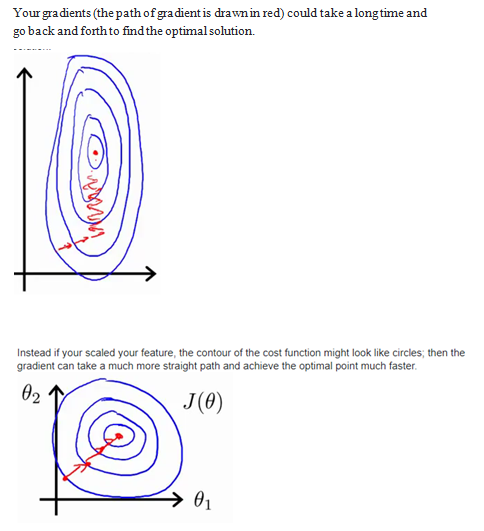

In [96]:
from IPython.display import Image
Image(filename='Std_Con.PNG')

In [97]:
train_x_1.columns

Index(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage',
       'CCAvg_Income_ratio', 'Family_2', 'Family_3', 'Family_4', 'Education_2',
       'Education_3', 'CDAccount_1'],
      dtype='object')

In [98]:
# First filter the continuous variables
int_obj=[x for x in train_x_1.dtypes.index if train_x_1.dtypes[x]!='object']
cat_var = {'Family_2','Family_3','Family_4','Education_2','Education_3','CDAccount_1'}
int_list = [i for i in int_obj if i not in cat_var]
int_list

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'CCAvg_Income_ratio']

In [99]:
# copy the train and test x data frame
X_train=train_x_1.copy()
index_val=X_train.index
X_test=test_x_1.copy()
index_value=X_test.index

In [100]:
from sklearn.preprocessing import scale

In [101]:
# Apply feature standardization using scale method
X_train_scale=scale(X_train[int_list])
X_train_Scale_df=pd.DataFrame(data=X_train_scale,columns=int_list,index=index_val)

X_test_Scale=scale(X_test[int_list])
X_test_Scale_df=pd.DataFrame(data=X_test_Scale,columns=int_list,index=index_value)

In [102]:
# filter without integer
X_train_1=train_x_1.copy()
X_train_1.drop(int_list,axis=1,inplace=True)
X_test_1=test_x_1.copy()
X_test_1.drop(int_list,axis=1,inplace=True)

In [103]:
# concat both the scaled dataframe and non-continuous feature df
X_trainset=pd.concat([X_train_1,X_train_Scale_df],axis=1)
X_testset=pd.concat([X_test_1,X_test_Scale_df],axis=1)

                                                d.Support Vector Machine

In [104]:
X_trainset.head() # Cross check to verify the values are standardized

,Family_2,Family_3,Family_4,Education_2,Education_3,CDAccount_1,Age,Experience,Income,CCAvg,Mortgage,CCAvg_Income_ratio
1282,0.0,0.0,0.0,1.0,0.0,0.0,0.500969,0.522471,-0.406791,-0.368381,1.821373,-0.239539
2348,0.0,0.0,1.0,0.0,0.0,0.0,0.500969,0.435349,0.241249,1.679334,-0.571630,1.720905
816,0.0,1.0,0.0,1.0,0.0,0.0,0.327052,0.261105,-0.190777,-0.709667,2.095149,-0.981226
3866,0.0,0.0,1.0,0.0,0.0,0.0,0.500969,0.435349,-0.730810,-0.083976,-0.571630,0.991903
245,1.0,0.0,0.0,1.0,0.0,0.0,-0.890370,-0.784360,-1.054830,-0.539024,-0.571630,0.703693


In [105]:
from sklearn.svm import SVC

                                    GridSearchCV - To choose the optimal parameter

To maintain the bias and variance trade-off, C and gamma parameter values are taken (min to max) to ensure 
to get the optimized values inbetween the hard and soft margin

In [106]:
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import GridSearchCV

param_grid=[{'C':[0.001,0.1,100,150,200,250],'kernel':['linear','rbf'],'gamma':[0.001,0.01,0.1,10,100]}]
scorer={'f1_score': make_scorer(f1_score)}

SVM_clf=SVC(class_weight='balanced')
SVM_GS=GridSearchCV(SVM_clf,param_grid=param_grid, scoring=scorer,refit='f1_score',cv=5,n_jobs=-1)
model_GS=SVM_GS.fit(X_trainset,train_y)
model_GS.best_params_

{'C': 250, 'gamma': 0.1, 'kernel': 'rbf'}

In [107]:
model_GS.best_score_

0.8863974633291366

                                      Build the model with the optimal parameter

In [108]:
SVM_inst=SVC(kernel='rbf',class_weight='balanced',C=200,gamma=0.1)
SVM_1=SVM_inst.fit(X_trainset,train_y)

In [109]:
# predict the test set
test_p=SVM_1.predict(X_testset)
metrics.f1_score(test_y,test_p) 

0.8524590163934427

In [110]:
Con_Mat_test = confusion_matrix(test_y,test_p)
Con_Mat_test

array([[895,  17],
       [ 10,  78]], dtype=int64)

In [111]:
cross_val=cross_val_score(SVM_1,X_trainset,train_y,cv=5,scoring='f1',n_jobs=-1)
cross_val.mean()

0.8798137222035981

In [112]:
fscore.append(metrics.f1_score(test_y,test_p) ) # for final comparison

In [113]:
cscore.append(cross_val.mean()) # for final comparison

                                    5.Adaptive Boosting with Decision Tree as base estimator

In [114]:
from sklearn.ensemble import AdaBoostClassifier
estimator=DecisionTreeClassifier(max_depth=2,random_state=100,class_weight='balanced')
AB= AdaBoostClassifier(base_estimator=estimator,random_state=100)

                                    Choosing the Optimal Parameter using Grid Search

In [115]:
paramgrid={'n_estimators':[50,75,100,125,200],'learning_rate':[0.01,0.04,0.1,0.15,0.3,0.5,0.6,0.75,0.8]}
scorer={'f1_score': make_scorer(f1_score)}
AdaGS=GridSearchCV(AB,param_grid=paramgrid,scoring=scorer,refit='f1_score',cv=5,n_jobs=-1)
AdaBo_Model=AdaGS.fit(train_x_1,train_y)
AdaBo_Model.best_score_

0.9150925070654247

In [116]:
AdaBo_Model.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

                                     Build the model with the optimal parameter

In [117]:
AB_1= AdaBoostClassifier(base_estimator=estimator,n_estimators=200,learning_rate=0.5,random_state=100)
m1=AB_1.fit(train_x_1,train_y)

In [118]:
# predict on test set
pred_test_boost=m1.predict(test_x_1)
metrics.f1_score(test_y,pred_test_boost)

0.9248554913294799

In [119]:
Confus_test_boost = confusion_matrix(test_y,pred_test_boost)
Confus_test_boost

array([[907,   5],
       [  8,  80]], dtype=int64)

                                        Test the Generalization of the model

In [120]:
cross_val=cross_val_score(m1,train_x_1,train_y,cv=5,scoring='f1',n_jobs=-1)
cross_val.mean()

0.9150730734646683

In [121]:
fscore.append(metrics.f1_score(test_y,pred_test_boost)) # for final comparison

In [122]:
cscore.append(cross_val.mean()) # for final comparison

                                              6. Gradient Boosting

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
GBM=GradientBoostingClassifier(random_state=100,max_features='sqrt')

In [124]:
paramgrid={'n_estimators':[50,75,100,200,300,400],'learning_rate':[0.01,0.03,0.05,0.1,0.3,0.5,0.6,0.7,0.8,1],'max_depth':[1,2,3,4,5,6,7]}
scorer={'f1_score': make_scorer(f1_score)}
GBMCV=GridSearchCV(GBM,param_grid=paramgrid,scoring=scorer,refit='f1_score',cv=5,n_jobs=-1)
GBM_Model=GBMCV.fit(train_x_1,train_y)
GBM_Model.best_score_

0.9411635760387144

In [125]:
GBM_Model.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}

                                       Build the model with the optimal parameter

In [126]:
GBM_model=GradientBoostingClassifier(max_depth=6,learning_rate=0.33,n_estimators=200,random_state=100,max_features='sqrt')
GBM_model=GBM_model.fit(train_x_1,train_y)

In [127]:
# predict on test set
test_Pred=GBM_model.predict(test_x_1)
metrics.f1_score(test_y,test_Pred)

0.9479768786127167

In [128]:
Conf_Gboost = confusion_matrix(test_y,test_Pred)
Conf_Gboost

array([[909,   3],
       [  6,  82]], dtype=int64)

In [129]:
cross_val=cross_val_score(GBM_model,train_x_1,train_y,cv=5,scoring='f1',n_jobs=-1)
cross_val.mean()

0.935443301463675

In [130]:
fscore.append(metrics.f1_score(test_y,test_Pred)) # for final comparison

In [131]:
cscore.append(cross_val.mean()) # for final comparison

                                                7. Xtreme Gradient Boosting

In [132]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [166]:
XGB=XGBClassifier( learning_rate =0.45, n_estimators=40, max_depth=2,objective='binary:logistic',scale_pos_weight=3,seed=27)
mod_XGB=XGB.fit(train_x_1,train_y)

In [167]:
# predict on test set
test_XGB=mod_XGB.predict(test_x_1)
metrics.f1_score(test_y,test_XGB)

0.9081081081081082

In [165]:
XGB_Matrix = confusion_matrix(test_y,test_XGB)
XGB_Matrix

array([[903,   9],
       [  5,  83]], dtype=int64)

                                       Test the Generalization of the model

In [136]:
cross_val=cross_val_score(mod_XGB,train_x_1,train_y,cv=5,scoring='f1',n_jobs=-1)
cross_val.mean()

0.9172000854771556

In [137]:
fscore.append(metrics.f1_score(test_y,test_XGB)) # for final comparison

In [138]:
cscore.append(cross_val.mean()) # for final comparison

                                          7. Finalizing and Saving the Model

In [139]:
model=['RandomForest','logistic','DecisionTree','SVM','AdaBoost','GradientBoosting','XtremeGradientBoosting']

In [140]:
model_comparison=pd.DataFrame({'Model':model,'Fscore':fscore,'cross_Validation_score':cscore})
model_comparison

,Model,Fscore,cross_Validation_score
0,RandomForest,0.931818,0.916812
1,logistic,0.645161,0.648625
2,DecisionTree,0.645740,0.626495
3,SVM,0.852459,0.879814
4,AdaBoost,0.924855,0.915073
5,GradientBoosting,0.947977,0.935443
6,XtremeGradientBoosting,0.959064,0.917200


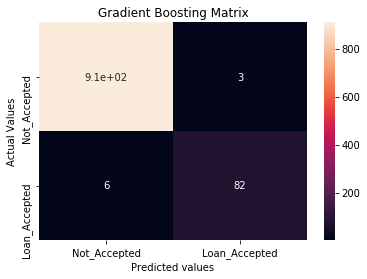

In [141]:
%matplotlib inline
import seaborn as sns
ax=plt.subplot()
sns.heatmap(Conf_Gboost,annot=True,ax=ax);
# labels, title
ax.set_xlabel('Predicted values');ax.set_ylabel('Actual Values');ax.set_title('Gradient Boosting Matrix')
ax.xaxis.set_ticklabels(['Not_Accepted','Loan_Accepted']);ax.yaxis.set_ticklabels(['Not_Accepted','Loan_Accepted']);

In [142]:
metrics.accuracy_score(test_y,test_Pred)

0.991

In [143]:
metrics.recall_score(test_y,test_Pred)

0.9318181818181818

In [144]:
metrics.precision_score(test_y,test_Pred)

0.9647058823529412

When comparing Gradient Boosting with all other models, Fscore and recall is better and also the model is well generalized.
So, Gradient Boosting is choosen as the final model.

                                         Saving the final Gradient_Boosting Model

pickle and joblib is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.

In [145]:
from sklearn.externals import joblib

In [146]:
# Save the final model
joblib.dump(GBM_model,'GBM.pkl')

['GBM.pkl']

In [147]:
# Save the model for deployment
joblib.dump(Log_M1,'Log.pkl')

['Log.pkl']

                                                9. Model Deployment

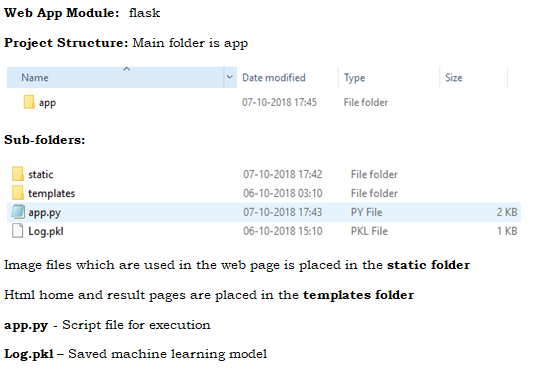

In [148]:
from IPython.display import Image
Image(filename='Web_deploy.PNG')

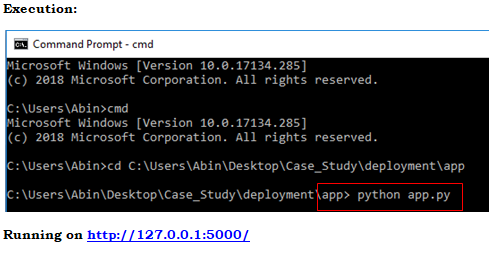

In [149]:
from IPython.display import Image
Image(filename='Execution.PNG')

Conclusion
Personal loan offers for the 5000 samples are thoroughly studied by various data analysis and explorations.
Various machine learning techniques have been applied and the final model is finalized by considering business requirements. 
And finally the model is deployed to make ease of the user who does not have practical knowledge about ML. 
Only thing he must do is to enter some inputs and get back the prediction of whether the person is the potential customer or not. 
